In [195]:
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt

In [196]:
dataset_names = ['Hartmann3', 'Branin', 'Levy4']

In [197]:
files = list(glob('./../results/prova_KG/*.json'))
sorted(files)

['./../results/prova_KG/Branin_2023-10-30_1226.json',
 './../results/prova_KG/Branin_2023-10-30_1238.json',
 './../results/prova_KG/Branin_2023-10-30_1306.json',
 './../results/prova_KG/Hartmann3_2023-10-30_1342.json',
 './../results/prova_KG/Hartmann3_2023-10-30_1352.json',
 './../results/prova_KG/Hartmann3_2023-10-30_1401.json',
 './../results/prova_KG/Levy4_2023-10-30_1506.json',
 './../results/prova_KG/Levy4_2023-10-30_1540.json',
 './../results/prova_KG/Levy4_2023-10-30_1549.json',
 './../results/prova_KG/LiGen_2023-10-12_1800.json',
 './../results/prova_KG/LiGen_2023-10-12_1804.json',
 './../results/prova_KG/LiGen_2023-10-12_1805.json',
 './../results/prova_KG/LiGen_2023-10-12_1816.json',
 './../results/prova_KG/LiGen_2023-10-12_1823.json',
 './../results/prova_KG/LiGen_2023-10-12_1833.json',
 './../results/prova_KG/LiGen_2023-10-12_1834.json',
 './../results/prova_KG/LiGen_2023-10-12_1838.json',
 './../results/prova_KG/LiGen_2023-10-12_1840.json',
 './../results/prova_KG/LiGen_2

In [198]:
dfs = {}
for filename in files:
    df = pd.read_json(filename, orient='records')
    # df = df.set_index('iteration')
    if 'prova_KG' in filename:
        df['algorithm'] = 'q-KG'
    else:
        df['algorithm'] = 'MALIBOO'
    df['filename'] = filename.rsplit('/', 1)[-1].replace('.json', '')
    for dataset_name in dataset_names:
        if dataset_name.upper() in filename.upper():
            dfs.setdefault(dataset_name.lower(), []).append(df)
            break

In [199]:
def select_data(dfs, selected_dataset):
    selected_dfs = {}
    for df in dfs[selected_dataset.lower()]:
        if len(df) == 1:
            # print(df.iloc[0])
            continue
        min_cost = df['computed_cost'].min()
        best_row = df.sort_values(['computed_cost', 'n_evaluations']).iloc[0]
        # print(best_row)
        algo = best_row['algorithm']
        if algo == 'q-KG':
            q = best_row['q']
            key = f'{algo}'.replace('q', str(q))
        else:
            mq = best_row['filename'][-1]
            key = f'EI mq{mq}'
        data_dict = {'data': df, 'computed_cost': best_row['computed_cost'], 'n_evaluations': best_row['n_evaluations']}
        selected_dfs.setdefault(key, data_dict)
        if (selected_dfs[key]['computed_cost'] > best_row['computed_cost'] 
            or (selected_dfs[key]['computed_cost'] == best_row['computed_cost'] and selected_dfs[key]['n_evaluations'] >= best_row['n_evaluations'])):
            print('Better!', key)
            print(min_cost)
            selected_dfs[key] = data_dict
    return selected_dfs

In [200]:
df

,iteration,n_initial_points,q,m,target,suggested_minimum,known_minimum,closest_point_in_domain,computed_cost,n_evaluations,error,error_ratio,algorithm,filename
0,0,3,3,0,StereoMatch,"[36.739459424551264, 1.170011555507468, 12.598...","[14, 3, 1, 1]","[34, 1, 13, 10]",190230,6,153439,4.170558,q-KG,StereoMatch_2023-10-12_2113
1,1,3,3,0,StereoMatch,"[36.739459424551264, 1.170011555507468, 12.598...","[14, 3, 1, 1]","[34, 1, 13, 10]",166590,9,129799,3.528010,q-KG,StereoMatch_2023-10-12_2113
2,2,3,3,0,StereoMatch,"[52.83961744319336, 2.268736287856785, 2.12070...","[14, 3, 1, 1]","[54, 2, 2, 9]",92295,12,55504,1.508630,q-KG,StereoMatch_2023-10-12_2113
3,3,3,3,0,StereoMatch,"[49.045598894870025, 2.623211236294535, 5.3798...","[14, 3, 1, 1]","[54, 3, 5, 5]",55345,15,18554,0.504308,q-KG,StereoMatch_2023-10-12_2113
4,4,3,3,0,StereoMatch,"[49.32365690149682, 2.573385375274818, 4.90388...","[14, 3, 1, 1]","[54, 3, 5, 5]",55345,18,18554,0.504308,q-KG,StereoMatch_2023-10-12_2113
5,5,3,3,0,StereoMatch,"[17.195999977608306, 3.0, 1.0, 6.600552422950541]","[14, 3, 1, 1]","[14, 3, 1, 7]",51387,21,14596,0.396727,q-KG,StereoMatch_2023-10-12_2113
6,6,3,3,0,StereoMatch,"[16.915078327871463, 3.0, 1.0, 6.60125307062449]","[14, 3, 1, 1]","[14, 3, 1, 7]",56399,24,19608,0.532956,q-KG,StereoMatch_2023-10-12_2113
7,7,3,3,0,StereoMatch,"[16.077190214548583, 3.0, 1.5885795928690571, ...","[14, 3, 1, 1]","[14, 3, 2, 2]",42932,27,6141,0.166916,q-KG,StereoMatch_2023-10-12_2113
8,8,3,3,0,StereoMatch,"[15.83717664222628, 3.0, 1.000000000000021, 2....","[14, 3, 1, 1]","[14, 3, 1, 2]",38578,30,1787,0.048572,q-KG,StereoMatch_2023-10-12_2113
9,9,3,3,0,StereoMatch,"[16.358582380768233, 3.0, 1.000000000000021, 2...","[14, 3, 1, 1]","[14, 3, 1, 2]",38578,33,1787,0.048572,q-KG,StereoMatch_2023-10-12_2113


In [201]:
result_list = []
for dataset_name in dataset_names:
    selected_dfs = select_data(dfs, dataset_name)
    known_minimum = None    
    for key, info in selected_dfs.items():
        df = info['data']
        last_row = df.iloc[-1]
        if known_minimum is None:
            known_minimum = info['computed_cost'] - last_row['error']
            result_list.append({
                'Dataset': dataset_name,
                'Algorithm': 'Known Minimum',
                '# Evaluations': '-',
                'Cost': known_minimum,
                'Error': 0,
                'Error Ratio': 0
        })
        result_list.append({
            'Dataset': dataset_name,
            'Algorithm': key,
            '# Evaluations': info['n_evaluations'],
            'Cost': info['computed_cost'],
            'Error': last_row['error'],
            'Error Ratio': last_row['error'] / known_minimum
        })
    
    # result_df = pd.DataFrame([{'Algorithm': key, '# Evaluations': ,'Cost': df['computed_cost']}
    #                           ])
result_df = pd.DataFrame(result_list)

Better! 3-KG
-3.8609682914073122
Better! 4-KG
-3.8614160897042322
Better! 2-KG
-3.853266585218818
Better! 2-KG
0.398088808117988
Better! 3-KG
0.398088808117988
Better! 4-KG
0.417395829247571
Better! 2-KG
6.321174780068543e-31
Better! 4-KG
6.321174780068543e-31
Better! 3-KG
6.321174780068543e-31


/tmp/ipykernel_310992/2475556590.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  'Error Ratio': last_row['error'] / known_minimum


In [202]:
mask = result_df['Dataset'] == 'Hartmann3'
result_df[mask][['Algorithm', '# Evaluations', 'Cost', 'Error', 'Error Ratio']]


,Algorithm,# Evaluations,Cost,Error,Error Ratio
0,Known Minimum,-,-3.862780,0.000000,0.000000
1,3-KG,60,-3.860968,0.001812,-0.000469
2,4-KG,55,-3.861416,0.001364,-0.000353
3,2-KG,50,-3.853267,0.009513,-0.002463


In [203]:
mask = result_df['Dataset'] == 'Branin'
result_df[mask][['Algorithm', '# Evaluations', 'Cost', 'Error', 'Error Ratio']]

,Algorithm,# Evaluations,Cost,Error,Error Ratio
4,Known Minimum,-,0.397869,0.000000,0.000000
5,2-KG,38,0.398089,0.000220,0.000552
6,3-KG,37,0.398089,0.002687,0.006754
7,4-KG,36,0.417396,0.019509,0.049033


In [204]:
mask = result_df['Dataset'] == 'Levy4'
result_df[mask][['Algorithm', '# Evaluations', 'Cost', 'Error', 'Error Ratio']]

,Algorithm,# Evaluations,Cost,Error,Error Ratio
8,Known Minimum,-,0.000000e+00,0.000000e+00,0.0
9,2-KG,67,6.321175e-31,6.321175e-31,inf
10,4-KG,77,6.321175e-31,6.321175e-31,inf
11,3-KG,80,6.321175e-31,6.321175e-31,inf


In [205]:
def plot(selected_dfs, selected_dataset):
    plt.figure(figsize=(12, 5))
    for key, data_dict in selected_dfs.items():
        df = data_dict['data']
        if len(df) == 1:
            print(df.iloc[0])

        plt.plot(df['n_evaluations'], df['error_ratio'], 
                 label=key, 
                 marker='+', 
                 linestyle=':'
                )
    plt.legend()
    plt.xlabel('# evaluations')
    plt.ylabel('Error Ratio')
    plt.title(f'{selected_dataset}')

Better! 3-KG
-3.8609682914073122
Better! 4-KG
-3.8614160897042322
Better! 2-KG
-3.853266585218818


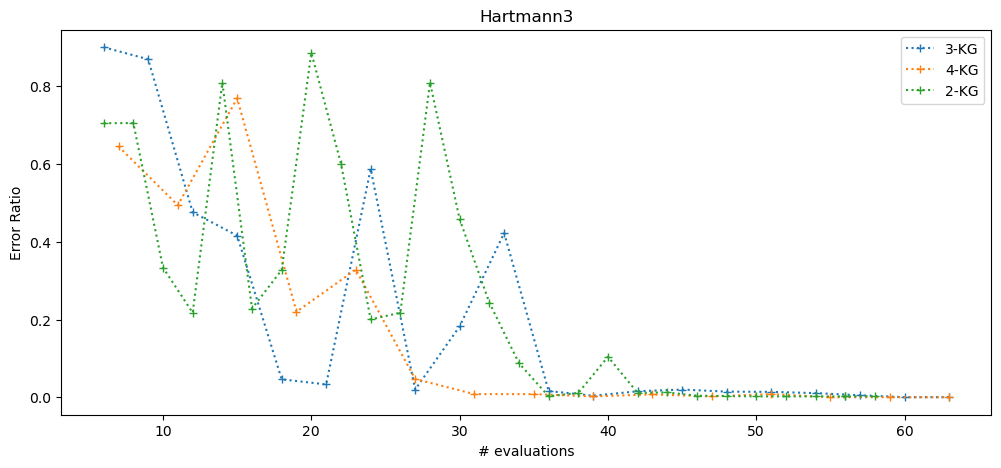

In [206]:
selected_dfs = select_data(dfs, 'Hartmann3')
plot(selected_dfs, 'Hartmann3')

Better! 2-KG
0.398088808117988
Better! 3-KG
0.398088808117988
Better! 4-KG
0.417395829247571


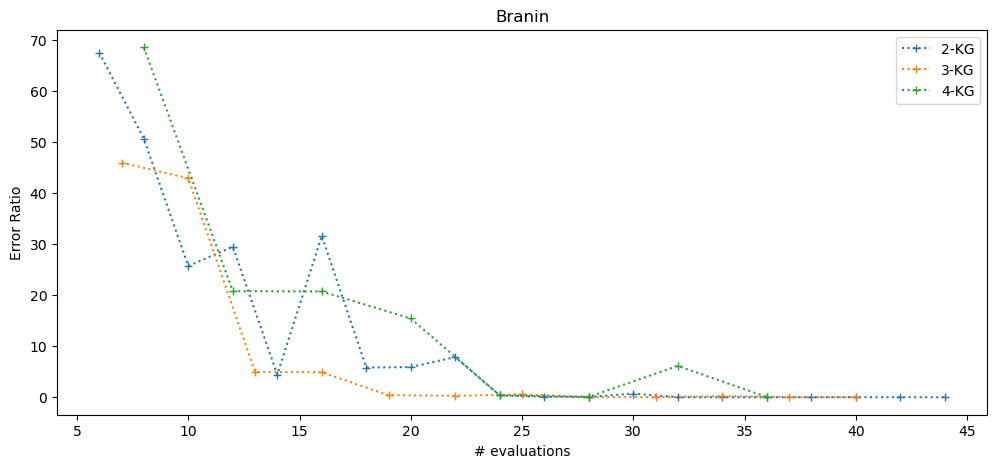

In [207]:
selected_dfs = select_data(dfs, 'Branin')
plot(selected_dfs, 'Branin')

In [208]:
def plot2(selected_dfs, selected_dataset):
    plt.figure(figsize=(12, 5))
    for key, data_dict in selected_dfs.items():
        df = data_dict['data']
        if len(df) == 1:
            print(df.iloc[0])

        plt.plot(df['n_evaluations'], df['error'], 
                 label=key, 
                 marker='+', 
                 linestyle=':'
                )
    plt.legend()
    plt.xlabel('# evaluations')
    plt.ylabel('Error')
    plt.title(f'{selected_dataset}')

Better! 2-KG
6.321174780068543e-31
Better! 4-KG
6.321174780068543e-31
Better! 3-KG
6.321174780068543e-31


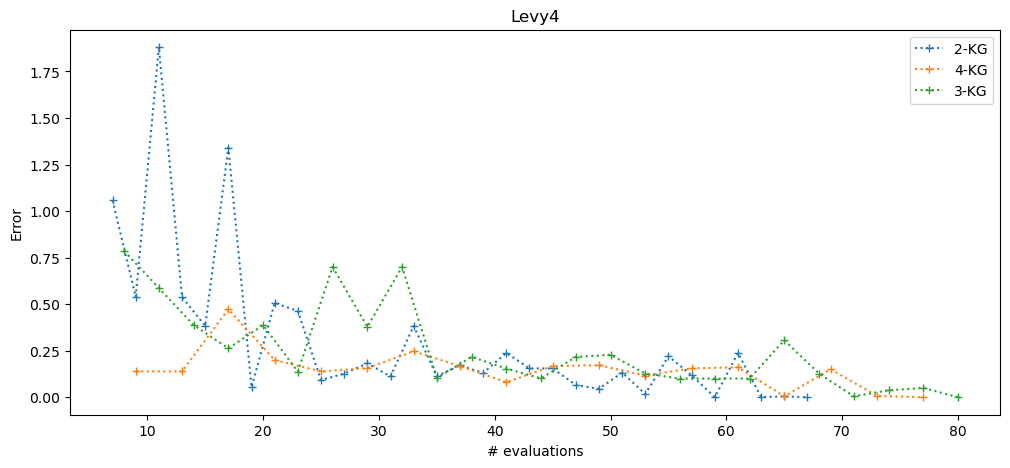

In [209]:
selected_dfs = select_data(dfs, 'Levy4')
plot2(selected_dfs, 'Levy4')